In [161]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


global Mearth, MolmassAir, Rgass, G, P0, Rearth, Pe, Ve, Cd, Ae, Af, M
Mearth = 5.97219*10**24   #kg
MolmassAir = 0.029        #kg/mol
Rgass = 8.3145            #J/(mol k)
G = 6.67408*10**(-11)     #m^3/(kg s^2)
P0 = 101325               #Pa
Rearth = 6371000          #m    radius earth
Pe = 126000               #Pa   Presure exhaust
Ve = 1000                 #m/s  veolocity exhaust 
Cd = 0.4                  #drag constant
Ae = 1                    #m^2  surface exhaust
Af = 2                    #m^2  drag surface
Mstart = 1420             #kg   Mass begin
Me = 950                  #kg   empty mass of rocket
m = 4                     #kg/s mass usage
dt = 0.01                 #s    time step
Nt = 5000000              #number of time steps

timeArray = np.linspace(0,Nt*dt,Nt)
y = np.zeros(Nt)
v = np.zeros(Nt)
gamma = np.zeros(Nt)
theta = np.zeros(Nt)
Ft = np.zeros(Nt)
Fd = np.zeros(Nt)
Fg = np.zeros(Nt)

gamma[0] = np.pi/2 - 0.00015
v[0] = 0.01
y[0] = 0.01

def temperatureAtHeight(y):
    y = float(y)
    if y < 10000:
        return 215 - 0.0073*215
    elif y < 20000:
        return 215
    elif y < 50000:
        return 176+2/3 + 0.00186667*y
    elif y < 55000:
        return 271
    elif y < 80000:
        return 469 - 0.0036*y
    elif y < 90000:
        return 181
    elif y < 316000:
        return 0.0045*y -224
    else:
        return 1200

def calculateGravity(y):
    return G*Mearth/(y + Rearth)**2
    
def presureAtHeight(y):
    T = temperatureAtHeight(y)
    g = calculateGravity(y)
    return P0*np.exp(-MolmassAir*g*y/(Rgass*T))

def forceCalculation(y,v,M,gamma):
    T = temperatureAtHeight(y)
    g = calculateGravity(y)
    p0 = presureAtHeight(y)
    rho = p0*MolmassAir/(Rgass*T)
    if M == Me:
        Ft = 0
    else:
        Ft = m/M*Ve + (Pe-p0)*Ae/M
    Fd = Cd*Af*rho*v/(2*M)
    Fg = g
    Fv = Ft - Fd - g*np.sin(gamma)
    Fgamma = v*np.cos(gamma)/(y+Rearth) - Fg/v*np.cos(gamma)
    return Fv, Fgamma, Ft, Fd, Fg

M = Mstart
for n in range(1,Nt):
    Fv, Fgamma, Ft[n-1], Fd[n-1], Fg[n-1]= forceCalculation(y[n-1],v[n-1],M,gamma[n-1])
    vx = v[n-1] + dt*Fv/2
    gammax = gamma[n-1] + dt*Fgamma/2
    y[n] = y[n-1] + vx*dt*np.sin(gammax)
    if y [n] < 0:
        break
    theta[n] = theta[n-1] + vx*dt*np.cos(gammax)/(y[n-1]+Rearth)
    M = max(M - m*dt,Me)
    Fv, Fgamma, Ft[n], Fd[n], Fg[n] = forceCalculation(y[n-1],vx,M,gammax)
    v[n] = vx + dt*Fv/2
    gamma[n] = gammax + dt*Fgamma/2
    

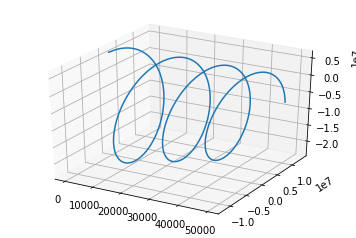

In [162]:
r = y + Rearth
xs = r*np.cos(theta)
ys = r*np.sin(theta)
ax = plt.axes(projection='3d')
ax.plot3D(timeArray, ys, xs)

plt.show()

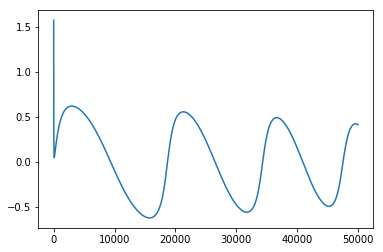

In [163]:
plt.plot(timeArray,gamma)
plt.show()

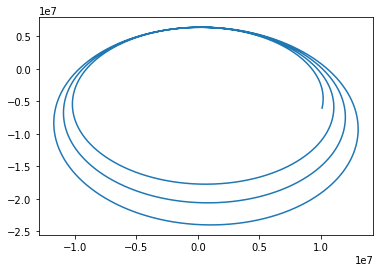

In [164]:
plt.plot(ys,xs)
plt.show()

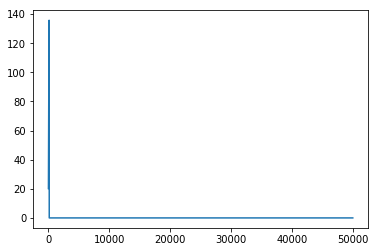

In [165]:
plt.plot(timeArray,Ft)
plt.show()

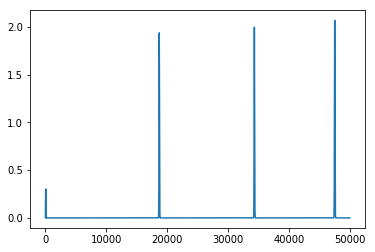

In [166]:
plt.plot(timeArray,Fd)
plt.show()

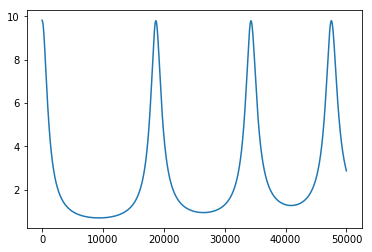

In [167]:
plt.plot(timeArray,Fg)
plt.show()

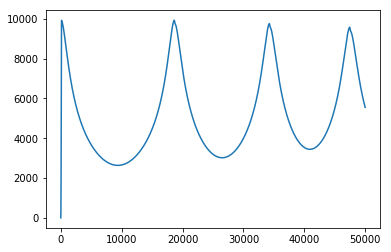

In [168]:
plt.plot(timeArray,v)
plt.show()